Dataset Sample:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

=== K-Means Clustering ===


C:\Users\janvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\janvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


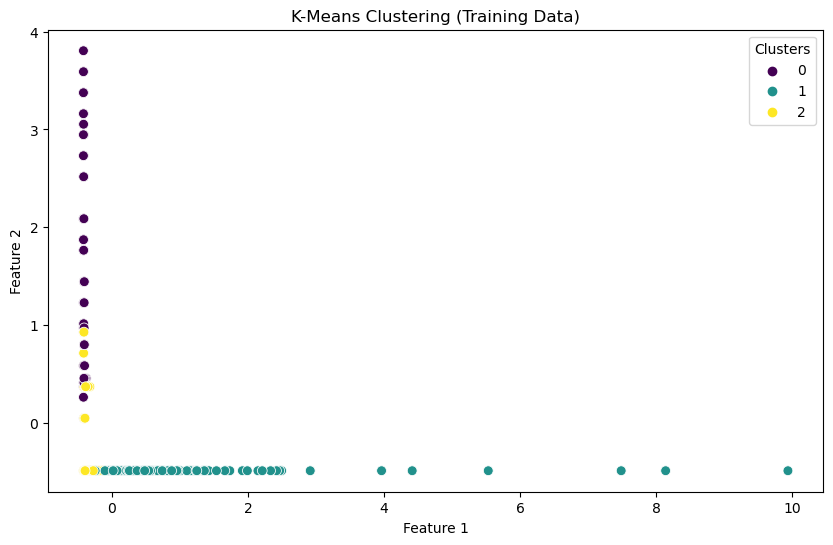

K-Means Silhouette Score (Train): 0.23601714310106917
K-Means Davies-Bouldin Index (Train): 1.4215825664162616

=== DBSCAN Clustering ===


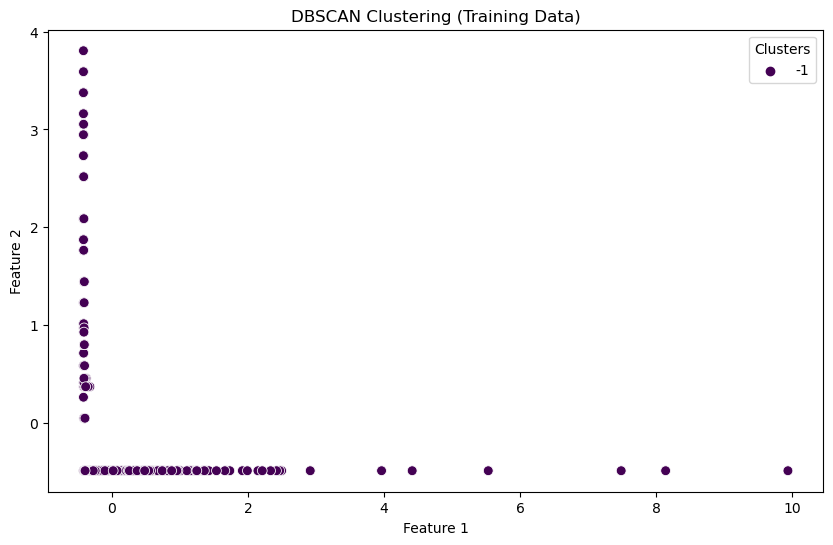

DBSCAN Silhouette Score (Train): None
DBSCAN Davies-Bouldin Index (Train): None

=== Comparison of Clustering Algorithms ===
Metric		K-Means		DBSCAN
Silhouette	0.236		N/A
Davies-Bouldin	1.422		N/A


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
# Assuming the dataset is named 'cleaned_data.csv' and stored in the working directory
data = pd.read_csv("Sample.csv")

# Display the first few rows of the dataset
print("Dataset Sample:")
print(data.head())

# Step 2: Preprocess the data
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing subsets
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Step 3: K-Means Clustering
print("\n=== K-Means Clustering ===")
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
kmeans.fit(X_train)

# Predict cluster labels for training and testing data
train_labels_kmeans = kmeans.predict(X_train)
test_labels_kmeans = kmeans.predict(X_test)

# Visualize clusters (training data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=train_labels_kmeans, palette='viridis', s=50)
plt.title("K-Means Clustering (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Clusters")
plt.show()

# Evaluate K-Means Clustering
silhouette_kmeans_train = silhouette_score(X_train, train_labels_kmeans)
davies_bouldin_kmeans_train = davies_bouldin_score(X_train, train_labels_kmeans)

print(f"K-Means Silhouette Score (Train): {silhouette_kmeans_train}")
print(f"K-Means Davies-Bouldin Index (Train): {davies_bouldin_kmeans_train}")

# Step 4: DBSCAN Clustering
print("\n=== DBSCAN Clustering ===")
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust hyperparameters as needed
dbscan.fit(X_train)

# Get cluster labels for training data
train_labels_dbscan = dbscan.labels_

# Visualize clusters (training data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=train_labels_dbscan, palette='viridis', s=50)
plt.title("DBSCAN Clustering (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Clusters")
plt.show()

# Evaluate DBSCAN Clustering
if len(set(train_labels_dbscan)) > 1:  # Only evaluate if clusters exist
    silhouette_dbscan_train = silhouette_score(X_train, train_labels_dbscan)
    davies_bouldin_dbscan_train = davies_bouldin_score(X_train, train_labels_dbscan)
else:
    silhouette_dbscan_train = None
    davies_bouldin_dbscan_train = None

print(f"DBSCAN Silhouette Score (Train): {silhouette_dbscan_train}")
print(f"DBSCAN Davies-Bouldin Index (Train): {davies_bouldin_dbscan_train}")

# Step 5: Comparison of Results
print("\n=== Comparison of Clustering Algorithms ===")
print("Metric\t\tK-Means\t\tDBSCAN")
print(f"Silhouette\t{silhouette_kmeans_train:.3f}\t\t{silhouette_dbscan_train if silhouette_dbscan_train else 'N/A'}")
print(f"Davies-Bouldin\t{davies_bouldin_kmeans_train:.3f}\t\t{davies_bouldin_dbscan_train if davies_bouldin_dbscan_train else 'N/A'}")
